# Applying and Evaluating DBSCAN Clustering

DBSCAN(Density based spatial Clustering of Applications with Noise) is clustering technique used to mine high density grouping of similar data points from given data set. The key characteristics of DBSCAN is that it not only identifies high dense areas but, also discovers outliers present in the data. It works by identifying core, border data points in the data set. Core data points forms dense clusters whereas, border data points lies in the neighbourhood of core data points. Any data point which is neither core nor border are called outliers. DBSCAN works with two key parameters namely, eps and minpts which are set by the user.  Dense clusters are formed by connecting core, border data points such that there are at least minpts  data points within eps distance. Unlike K-means it does not require user to input number of clusters requires rather, it identifies possible number of clusters by itself.

The key steps to apply DBSCAN clustering algorithm are:

1. Load data set

2. Set eps parameter is usually set to 3 but for high dimensional data set, it can be set using  2*(D-1) where D is dimensionality of the data set. Once eps is set then identify setting of minpts using knee graph.

3. Apply DBSCAN on the data set using parameters set in step 2

4. Visualize clustering results

5. Evaluate cluserting output using Silhouette score

6. Revise minpts setting based on Silhouette score and reapply DBSCAN 

Scikit learn library supports built in functionality for applying DBSCAN clustering, inspecting resukts and analysis of clustering output. In this tutorial, you will learn to use these functionalities to apply clustering on given data set.

The data set used for demonstration is 2D. The two features are namely, Milk and Grocery. The information on these features is comprised from 441 customers showcasing there buying patterns of milk and grocery on daily basis. The idea is to apply clustering to identify similarity of  behaviour of customers in their buying patterns.



# 1. Loading Data set

In [ ]:
# pandas for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
% matplotlib inline


# importing StandardScaler from  scikit learn for data pre-processing
from sklearn.preprocessing import StandardScaler

# importing DBSCAN from sklearn
from sklearn.cluster import DBSCAN

# importing  silhouette_score metrices available in sklearn
from sklearn.metrics.cluster import silhouette_score

from sklearn.neighbors import NearestNeighbors

# 2. Loading Data set


In [ ]:
My_data = pd.read_csv('Grocery_data.csv')

# getting summary of data set
My_data.describe()



,Milk,Grocery
count,440.000000,440.000000
mean,5796.265909,7951.277273
std,7380.377175,9503.162829
min,55.000000,3.000000
25%,1533.000000,2153.000000
50%,3627.000000,4755.500000
75%,7190.250000,10655.750000
max,73498.000000,92780.000000


The features appears to be in different scale. It is good practice to standardize the data set before apply clustering algorithm. In the next step,StandardScaler() function from sklearn is used to preprocess data set 

# 3.  Standardize Data set

In [ ]:
# Standardizing data set
stscaler = StandardScaler().fit(My_data)
My_data = stscaler.transform(My_data)
My_data=pd.DataFrame(My_data)

### 4. Setting minpts and eps  Parameters 

For 2D data set, minpts set to 3. In order to find value of eps parameter, knee graph can be used. The knee graph is plotted by calculating the distance to the nearest n data points for each data point present in the data set, sorting the distances and putting them on the graph.  Using Sklearn, distance from each data point to its closest neighbour can be calculated using NearestNeighbors() function. The point itself is included in n_neighbors. This function kneighbors  returns two arrays, one which contains the distance to the closest n_neighbors data points and the other which contains the index for each of those data points. The sorted distances are used to make a plot. The optimal value for eps can be  at the point of maximum curvature on the graph.

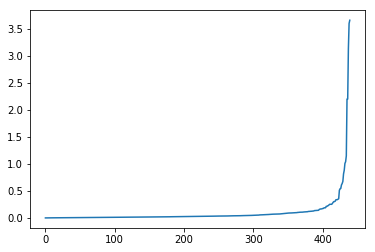

In [ ]:
# calculating 2NN of each data points present in the data set
neigh_k = NearestNeighbors(n_neighbors=3)
Knbrs = neigh_k.fit(My_data)
distances, indices = Knbrs.kneighbors(My_data)

# sorting the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
# plotting the distances
plt.plot(distances)

Based on Knee plot, best eps value is 0.2 for the given data set

# 5.  Applying DBSCAN and Analysing Cluserting Output

In [ ]:
# applying DBSCAN with eps =0.2 and minpts= 3
clusters = DBSCAN(eps=0.2, min_samples=3)
Dbscan_mapping = clusters.fit_predict(My_data)

# Getting total number of clusters discovered by DBSCAN
print("Total number of cluster(including Outliers): ",len(np.unique(Dbscan_mapping)))


# making dataframe that details mapping of cluster with each data point present in the 
# data set
Mapping_customers = pd.DataFrame(
    {'Customer ID': list(range(0,440)),
     'Cluster_Mapping': Dbscan_mapping,
     
    })
print("Cluster mapping of data points(top 10)\n")
print(Mapping_customers.head(10))
print("Number of data points per cluster\n")
print("----------------------------------")
print(Mapping_customers['Cluster_Mapping'].value_counts())



Total number of cluster(including Outliers):  3
Cluster mapping of data points(top 10)

   Customer ID  Cluster_Mapping
0            0                0
1            1                0
2            2                0
3            3                0
4            4                0
5            5                0
6            6                0
7            7                0
8            8                0
9            9                0
Number of data points per cluster

----------------------------------
 0    382
-1     51
 1      7
Name: Cluster_Mapping, dtype: int64


Total number clusters identified by DBSCAN are 2. The first cluster has 382 samples and the second cluster contains 7 data points. The 51 samples belonging to -1 class referes to outliers present in the data set. 

# 6.  Visualizing Clustering Output

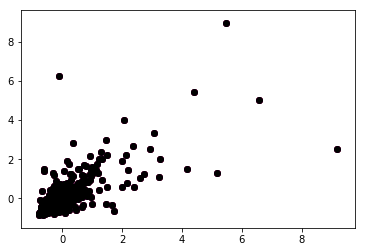

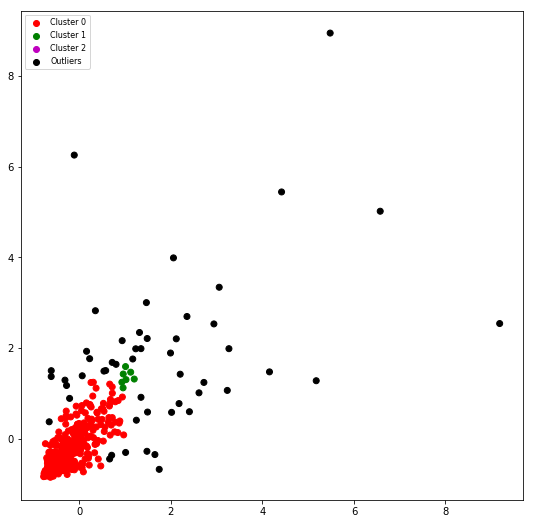

In [ ]:
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'm'
colours[-1] = 'k'  
cvec = [colours[label] for label in Dbscan_mapping] 
colors = ['r', 'g','m','k'] 


r = plt.scatter( 
        My_data.iloc[:,0],My_data.iloc[:,1], marker ='o', color = colors[0]) 
g = plt.scatter( 
        My_data.iloc[:,0],My_data.iloc[:,1], marker ='o', color = colors[1]) 
m = plt.scatter( 
        My_data.iloc[:,0],My_data.iloc[:,1], marker ='o', color = colors[2]) 
k = plt.scatter( 
       My_data.iloc[:,0],My_data.iloc[:,1], marker ='o', color = colors[-1])


plt.figure(figsize =(9, 9)) 
plt.scatter(My_data.iloc[:,0],My_data.iloc[:,1], c = cvec) 
plt.legend((r, g, m, k), 
           ('Cluster 0', 'Cluster 1', 'Cluster 2','Outliers'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 1, 
           fontsize = 8) 
plt.show() 

Black data points are outliers. The two cluserters are visible in red and green colors.

# 7. Evaluate Cluserting Output using Silhouette Score

From clustering output it is appearing that if we change setting of eps paramter then black data points very close to red dense cluster can be interegated together. The robust testing on right eps paramter can be identified using Silhouette score. Where, on different eps values DBSCAN clustering output is evaluated. The eps value where silhouette score is maximum can be taken as final eps value. 

In [ ]:
# looping over different eps value and applying DBSCAN
for radius in np.arange(0.2, 2, 0.2):
    Cluster_result = DBSCAN(eps=radius, min_samples=3).fit_predict(My_data)
   
    #compute silhouette_score of each clustering output
    
    Cluster_score = silhouette_score(My_data,Cluster_result)
    print ("For eps distance = {}, silhouette score is {})".format(radius, Cluster_score))




For eps distance = 0.2, silhouette score is 0.4769515749125393)
For eps distance = 0.4, silhouette score is 0.47638087995721345)
For eps distance = 0.6000000000000001, silhouette score is 0.7936269437583037)
For eps distance = 0.8, silhouette score is 0.8075782537339545)
For eps distance = 1.0, silhouette score is 0.8232282163743244)
For eps distance = 1.2, silhouette score is 0.8478111081060252)
For eps distance = 1.4000000000000001, silhouette score is 0.8478111081060252)
For eps distance = 1.6, silhouette score is 0.8478111081060252)
For eps distance = 1.8, silhouette score is 0.8478111081060252)


Based on Silhouette score, it is wise to take eps =1.2. 

# 8. Reapplying DBSCAN with new eps value Identified by Silhouette score 

In [ ]:
# applying DBSCAN with eps =1.2 and minpts= 3
clusters = DBSCAN(eps=1.2, min_samples=3)
Dbscan_mapping = clusters.fit_predict(My_data)

# Getting total number of clusters discovered by DBSCAN
print("Total number of cluster(including Outliers): ",len(np.unique(Dbscan_mapping)))


# making dataframe that details mapping of cluster with each data point present in the 
# data set
Mapping_customers = pd.DataFrame(
    {'Customer ID': list(range(0,440)),
     'Cluster_Mapping': Dbscan_mapping,
     
    })
print("Cluster mapping of data points(top 10)\n")
print(Mapping_customers.head(10))
print("Number of data points per cluster\n")
print("----------------------------------")
print(Mapping_customers['Cluster_Mapping'].value_counts())




Total number of cluster(including Outliers):  2
Cluster mapping of data points(top 10)

   Customer ID  Cluster_Mapping
0            0                0
1            1                0
2            2                0
3            3                0
4            4                0
5            5                0
6            6                0
7            7                0
8            8                0
9            9                0
Number of data points per cluster

----------------------------------
 0    435
-1      5
Name: Cluster_Mapping, dtype: int64


# 9. Visualizing revised Cluserting output 

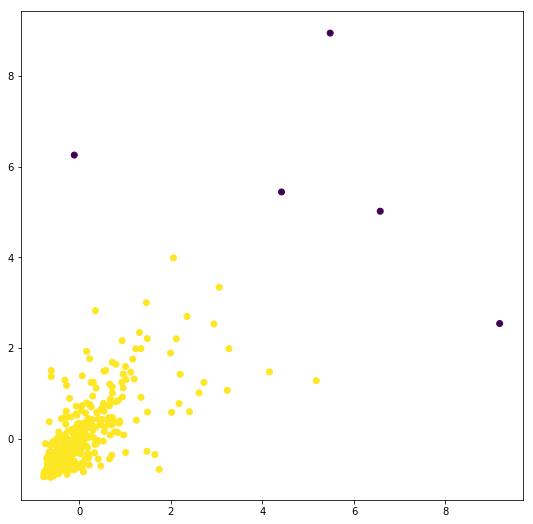

In [ ]:
plt.figure(figsize =(9, 9)) 
plt.scatter(My_data.iloc[:,0],My_data.iloc[:,1], c = Dbscan_mapping) 

Data set has one cluster(yellow data points) and 5 outli